# Imported Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Data Ingestion

In [3]:
boston_calendar = pd.read_csv('../project1_supplemental_files/airbnb_data/boston_calendar.csv')
seattle_calendar = pd.read_csv('../project1_supplemental_files/airbnb_data/seattle_calendar.csv')
boston_listings = pd.read_csv('../project1_supplemental_files/airbnb_data/boston_listings.csv')
seattle_listings = pd.read_csv('../project1_supplemental_files/airbnb_data/seattle_listings.csv')
boston_reviews = pd.read_csv('../project1_supplemental_files/airbnb_data/boston_reviews.csv')
seattle_reviews = pd.read_csv('../project1_supplemental_files/airbnb_data/seattle_reviews.csv')

# Data Prep

In [4]:
seattle_listings['state'] = 'WA'
seattle_listings['City'] = 'Seattle'
boston_listings['state'] = 'MA'
boston_listings['City'] = 'Boston'

In [5]:
combined_listings = pd.concat([boston_listings, seattle_listings], ignore_index=True)
combined_reviews = pd.concat([boston_reviews, seattle_reviews], ignore_index=True)

combined_listings['Price'] = combined_listings['price'].str.replace('$', '').str.replace(',', '').astype('float')
combined_listings['Superhost Status'] = combined_listings['host_is_superhost'].map({'t': 'Superhost', 'f': 'Regular host'})
combined_listings['Host Response Rate'] = combined_listings['host_response_rate'].str.replace('%', '').astype('float')

In [6]:
combined_listings

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,City,Price,Superhost Status,Host Response Rate
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,f,moderate,f,f,1,NaN,Boston,250.0,Regular host,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,t,moderate,f,f,1,1.30,Boston,65.0,Regular host,100.0
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,f,moderate,t,f,1,0.47,Boston,65.0,Superhost,100.0
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,f,moderate,f,f,1,1.00,Boston,75.0,Regular host,100.0
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,f,flexible,f,f,1,2.25,Boston,79.0,Superhost,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7398,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,f,strict,f,f,8,0.30,Seattle,359.0,Regular host,99.0
7399,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,f,moderate,f,f,1,2.00,Seattle,79.0,Regular host,100.0
7400,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,f,moderate,f,f,1,NaN,Seattle,93.0,Regular host,NaN
7401,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,f,moderate,f,f,1,NaN,Seattle,99.0,Regular host,100.0


# Calculating Average Prices

## Helper methods used for bucketing review ratings and host response rates

In [7]:
def rate_to_points(rating):
    """
    Categorizes review rating or host response rate from listings into a 4 point grading system for easier display in graphs.

    Parameters:
    rating (float): The review rating or host response rate to be categorized.

    Returns:
    str: The letter grade corresponding to the rating.
    """
    # If the rating is missing, return 'N/A'
    if pd.isnull(rating):
        return 0
    # Otherwise, return the corresponding letter grade
    elif rating >= 90:
        return 4
    elif rating >= 80:
        return 3
    elif rating >= 70:
        return 2
    # If the rating is below 70, return 1
    return 1

def rate_to_grade(rating):
    """
    Categorizes review rating or host response rate from listings into a letter grade for easier display in graphs.

    Parameters:
    rating (float): The review rating or host response rate to be categorized.

    Returns:
    str: The letter grade corresponding to the rating.
    """
    # If the rating is missing, return 'N/A'
    if pd.isnull(rating):
        return 'N/A'
    # Otherwise, return the corresponding letter grade
    elif rating >= 90:
        return 'A'
    elif rating >= 80:
        return 'B'
    elif rating >= 70:
        return 'C'
    # If the rating is below 60, return 'F'
    return 'F'

## Average Prices vs Superhost Status

In [8]:
average_price_per_superhost = combined_listings.groupby(['City', 'Superhost Status'])['Price'].mean().reset_index()
average_price_per_superhost['Price'] = average_price_per_superhost['Price'].round(2)
average_price_per_superhost

,City,Superhost Status,Price
0,Boston,Regular host,173.60
1,Boston,Superhost,176.43
2,Seattle,Regular host,127.39
3,Seattle,Superhost,130.14


## Price per Review Bucket and Superhost Status

In [9]:
sns.set_theme(context='notebook', style="whitegrid")

In [10]:
prices_per_rating = combined_listings[ ['id', 'City', 'review_scores_rating', 'Superhost Status', 'Price'] ].copy()

prices_per_rating['review_grade'] = prices_per_rating['review_scores_rating'].apply(rate_to_grade)

prices_per_rating = prices_per_rating \
                        .groupby( ['City', 'review_grade', 'Superhost Status'] ) \
                        .agg( count=('id', 'count'), average_price=('Price', 'mean') ) \
                        .reset_index() \
                        .sort_values( by=['City', 'review_grade', 'Superhost Status'] )

prices_per_rating['average_price'] = prices_per_rating['average_price'].round(2)

prices_per_rating.rename( columns={'review_grade': 'Review Grade', 'average_price': 'Average Price'}, inplace=True )

prices_per_rating = prices_per_rating[ prices_per_rating['Review Grade'] != 'N/A' ]

display(prices_per_rating)

,City,Review Grade,Superhost Status,count,Average Price
0,Boston,A,Regular host,1665,170.18
1,Boston,A,Superhost,387,174.05
2,Boston,B,Regular host,539,161.06
3,Boston,B,Superhost,6,185.67
4,Boston,C,Regular host,96,148.73
5,Boston,C,Superhost,1,175.00
6,Boston,F,Regular host,78,114.86
9,Seattle,A,Regular host,1999,128.08
10,Seattle,A,Superhost,746,127.85
11,Seattle,B,Regular host,352,117.82


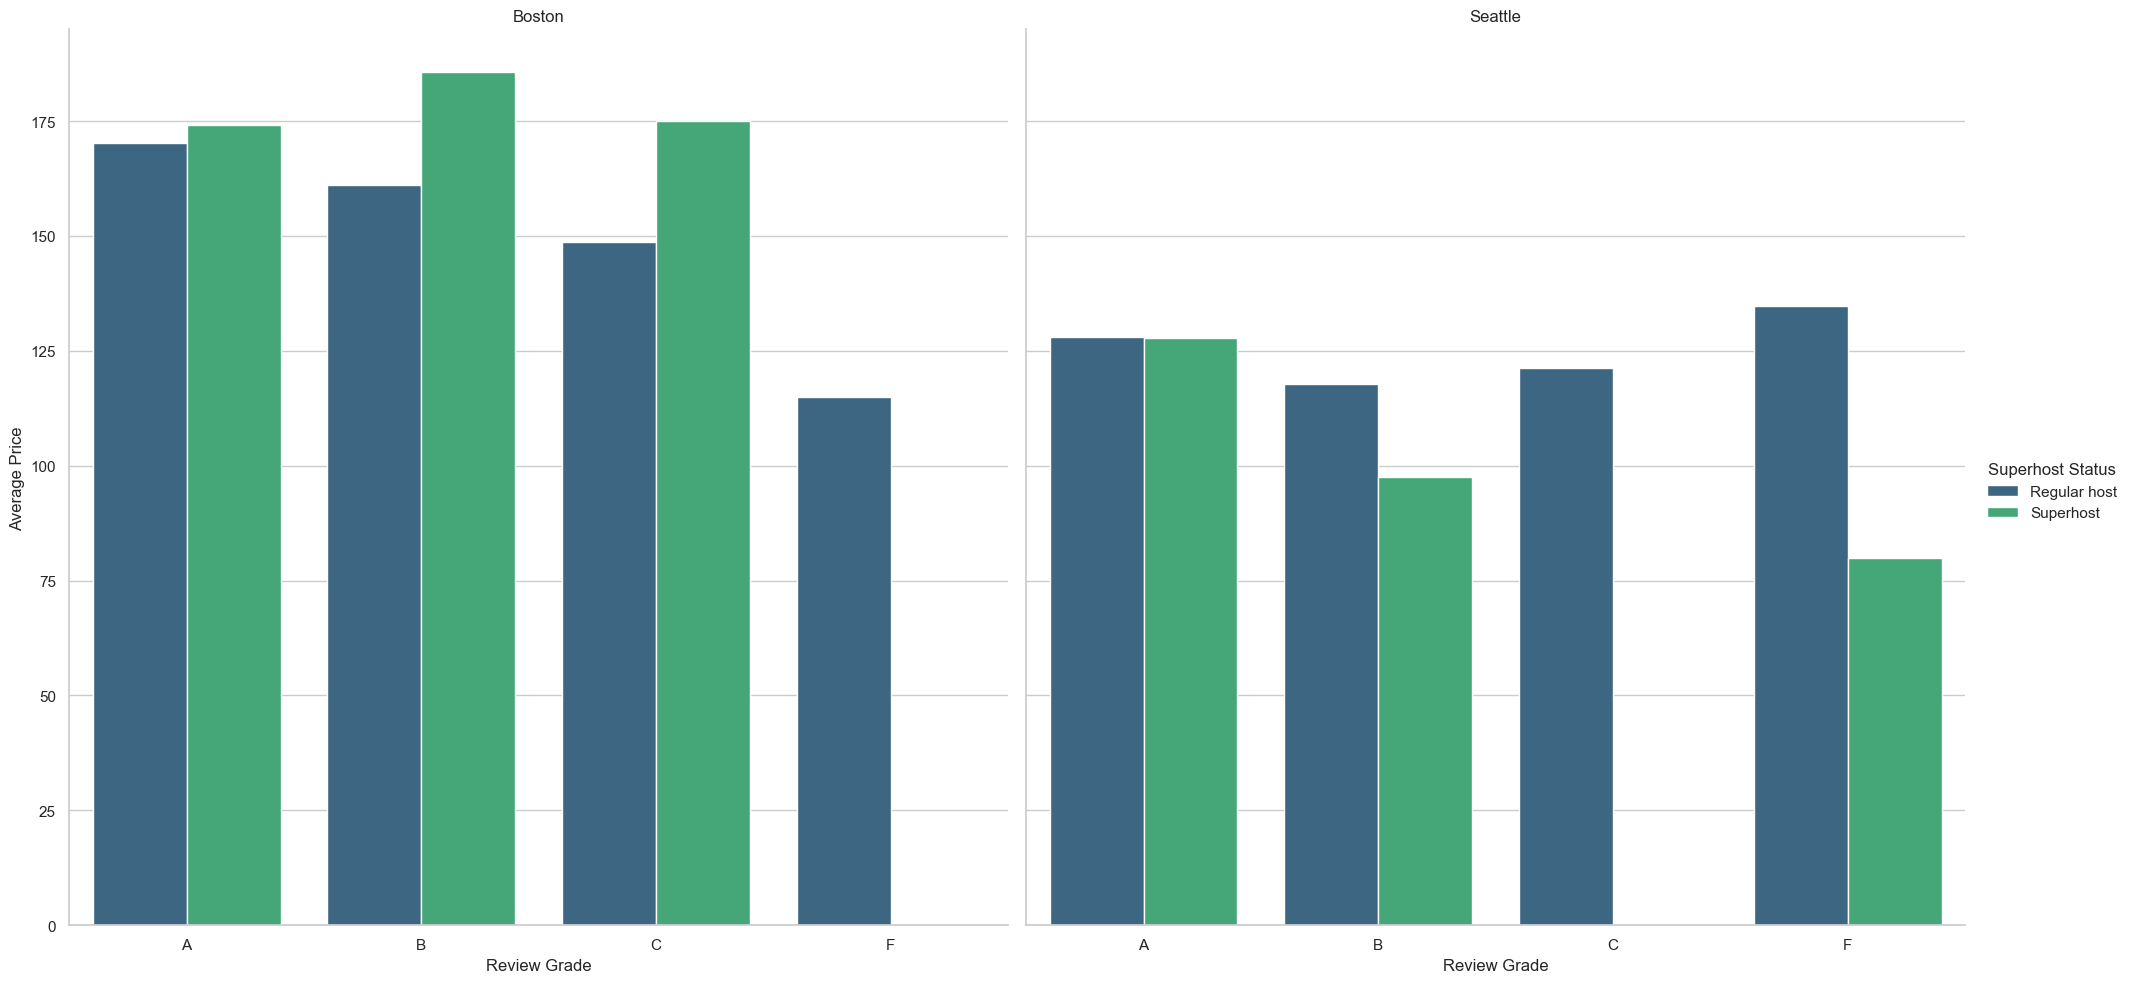

In [ ]:
price_per_rating_graph = sns.catplot(
                            data=prices_per_rating, kind='bar',
                            x='Review Grade', y='Average Price', 
                            col='City', hue='Superhost Status', 
                            height=10, palette='viridis'
                        )

price_per_rating_graph.set_axis_labels('Review Grade', 'Average Price ($)')
price_per_rating_graph.set_titles('{col_name}')

plt.show()

# Host Response Rate and Review Grades by Superhost Status

In [39]:
super_host_v_response_rate = combined_listings[['id', 'City', 'Superhost Status', 'Host Response Rate', 'review_scores_rating', 'Price']].copy()

super_host_v_response_rate['Review Grade'] = super_host_v_response_rate['review_scores_rating'].apply(rate_to_grade)
super_host_v_response_rate['Response Grade'] = super_host_v_response_rate['Host Response Rate'].apply(rate_to_grade)

super_host_v_response_rate = super_host_v_response_rate[ ( super_host_v_response_rate['Review Grade'] != 'N/A' ) & ( super_host_v_response_rate['Response Grade'] != 'N/A' ) ]

display(super_host_v_response_rate)

,id,City,Superhost Status,Host Response Rate,review_scores_rating,Price,Review Grade,Response Grade
1,3075044,Boston,Regular host,100.0,94.0,65.0,A,A
2,6976,Boston,Superhost,100.0,98.0,65.0,A,A
3,1436513,Boston,Regular host,100.0,100.0,75.0,A,A
4,7651065,Boston,Superhost,100.0,99.0,79.0,A,A
5,12386020,Boston,Superhost,100.0,100.0,75.0,A,A
...,...,...,...,...,...,...,...,...
7395,262764,Seattle,Regular host,100.0,92.0,154.0,A,A
7396,8578490,Seattle,Regular host,100.0,100.0,65.0,A,A
7397,3383329,Seattle,Superhost,100.0,96.0,95.0,A,A
7398,8101950,Seattle,Regular host,99.0,80.0,359.0,B,A


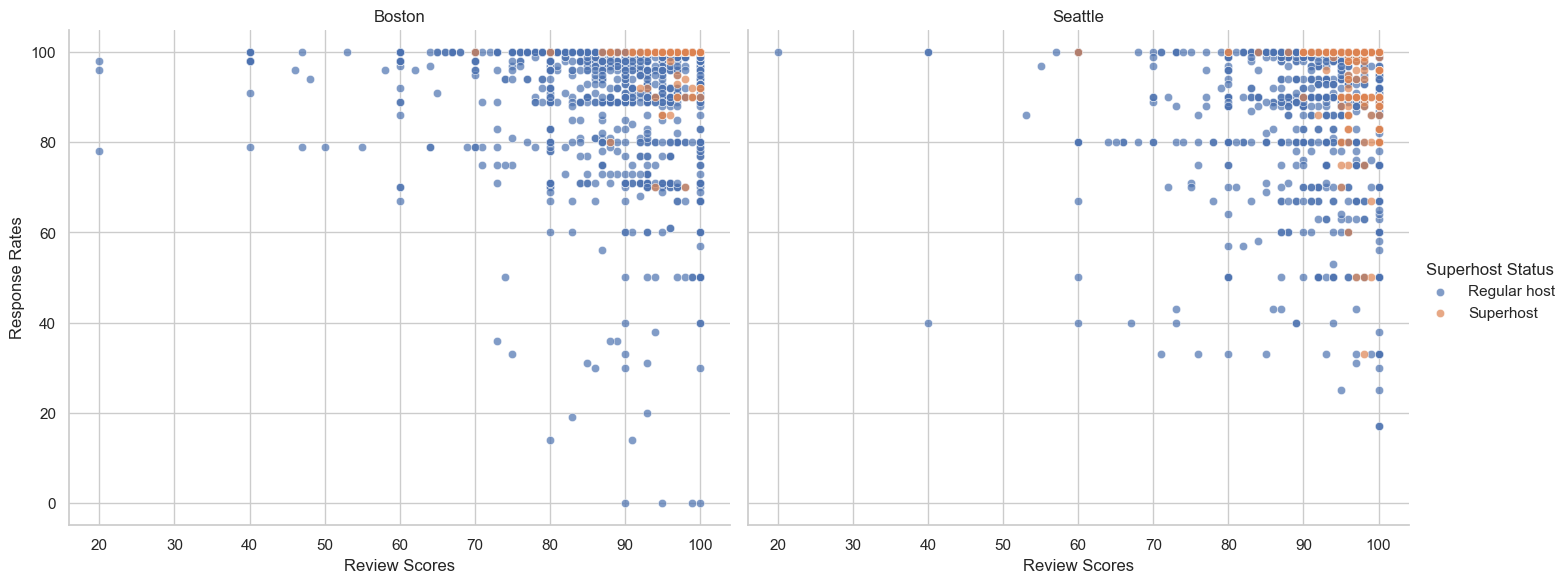

In [40]:
g = sns.FacetGrid(super_host_v_response_rate, col="City", hue="Superhost Status", height=6, aspect=1.2)
g.map(sns.scatterplot, "review_scores_rating", "Host Response Rate", alpha=.7)
g.add_legend()
g.set_axis_labels("Review Scores", "Response Rates")
g.set_titles("{col_name}")

plt.show()

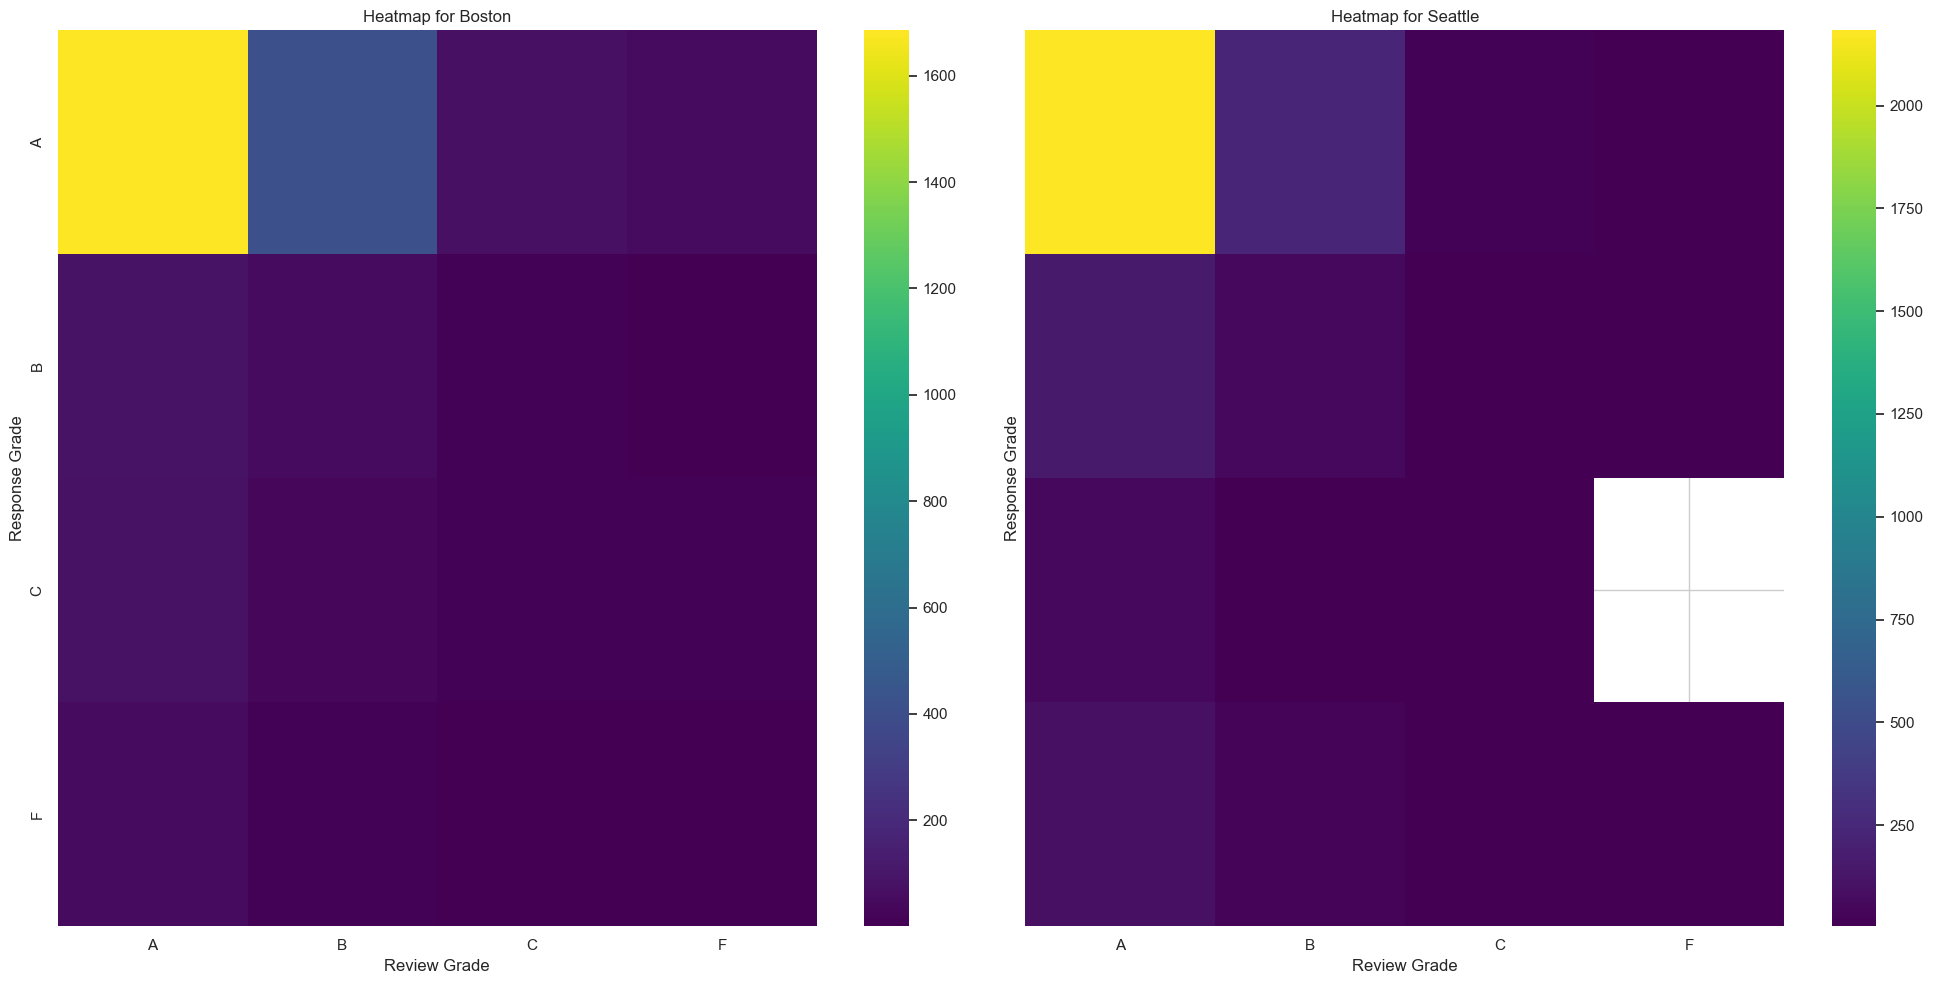

In [41]:
# Create a pivot table for the heatmap
pivot_table = super_host_v_response_rate.pivot_table(
    values='Price', 
    index='Response Grade', 
    columns='Review Grade', 
    aggfunc='count'
)

# Create a heatmap for each city
cities = super_host_v_response_rate['City'].unique()
fig, axes = plt.subplots(1, len(cities), figsize=(20, 10), sharey=True)

for i, city in enumerate(cities):
    city_data = super_host_v_response_rate[super_host_v_response_rate['City'] == city]
    pivot_table = city_data.pivot_table(
        values='Price', 
        index='Response Grade', 
        columns='Review Grade', 
        aggfunc='count'
    )
    sns.heatmap(pivot_table, ax=axes[i], cmap='viridis')
    axes[i].set_title(f'Heatmap for {city}')
    axes[i].set_xlabel('Review Grade')
    axes[i].set_ylabel('Response Grade')

plt.tight_layout()
plt.show()

C:\Users\elun1c0rn\AppData\Local\Temp\ipykernel_5220\2777569219.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boston_review_graph = sns.violinplot( data=boston_superhost_response_rate, x='Superhost Status', y='Review Grade', palette='viridis', ax=axes[0] )
C:\Users\elun1c0rn\AppData\Local\Temp\ipykernel_5220\2777569219.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boston_response_graph = sns.violinplot( data=boston_superhost_response_rate, x='Superhost Status', y='Response Grade', palette='viridis', ax=axes[1] )


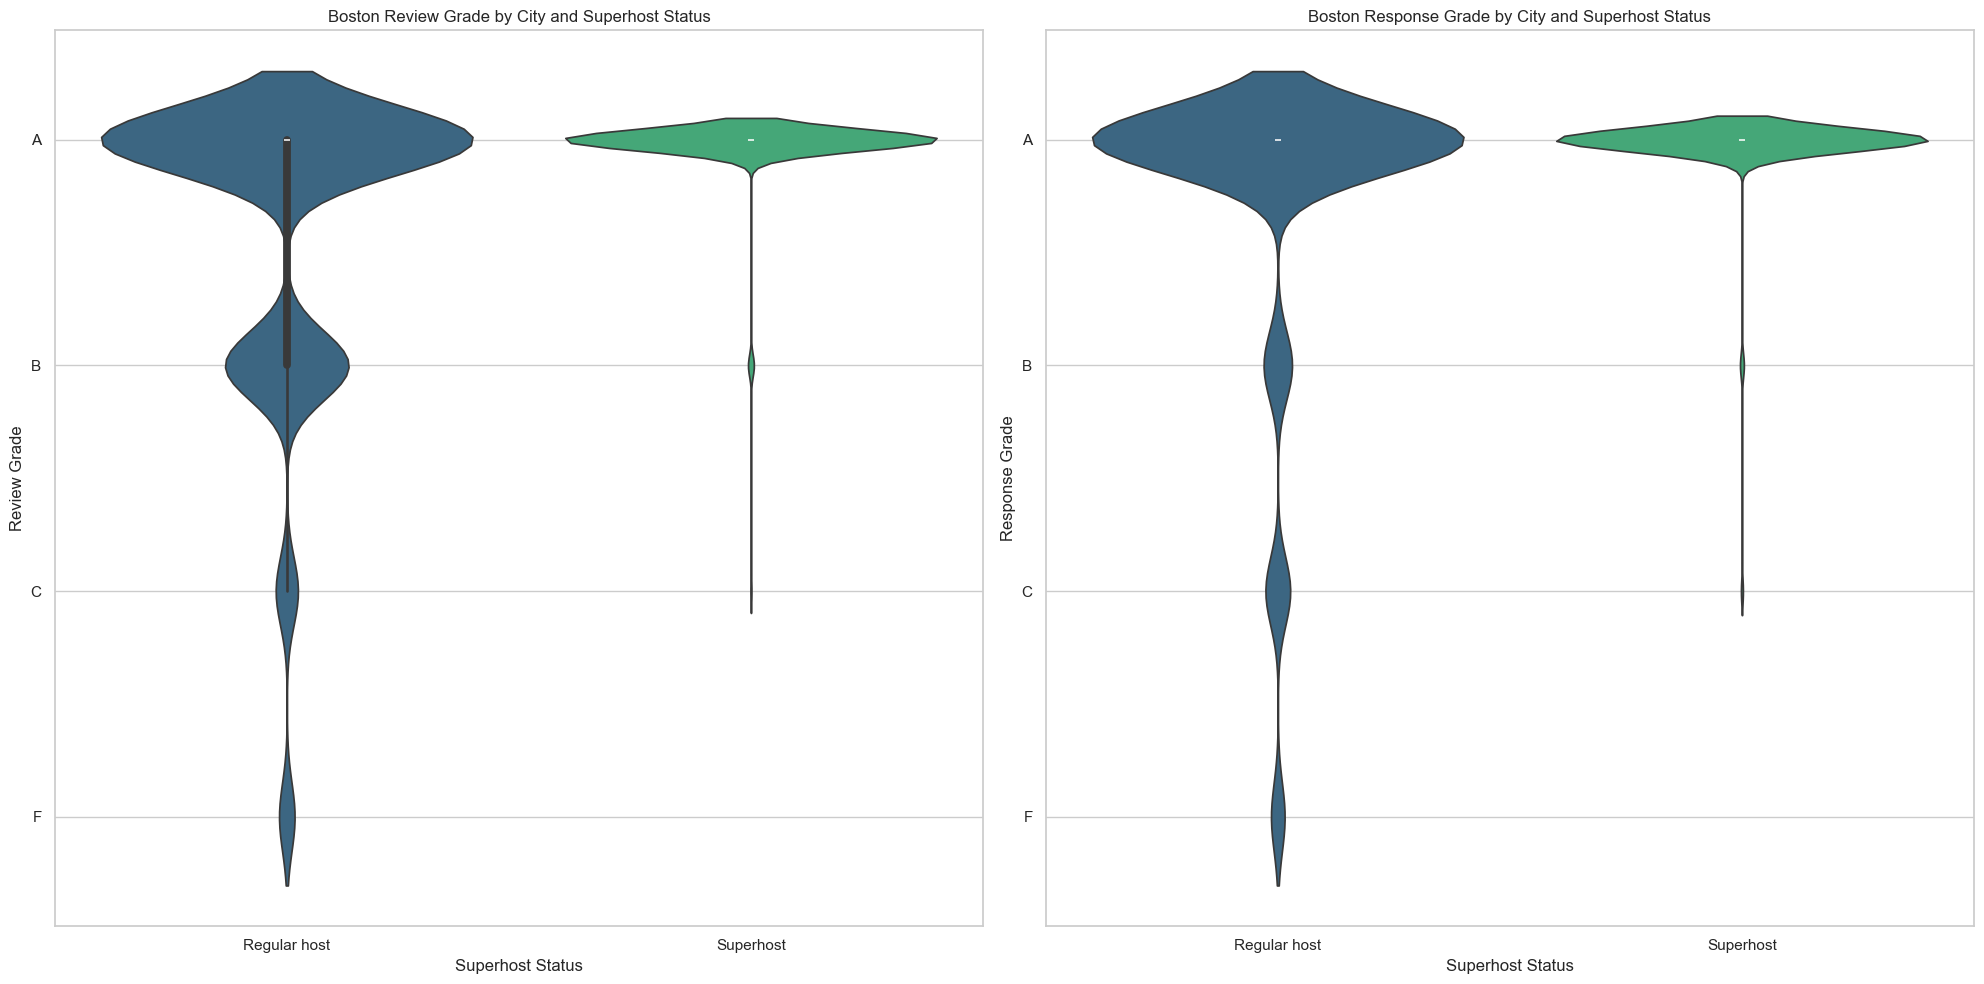

In [23]:
boston_superhost_response_rate = super_host_v_response_rate[ super_host_v_response_rate['City'] == 'Boston' ]
seattle_superhost_response_rate = super_host_v_response_rate[ super_host_v_response_rate['City'] == 'Seattle' ]

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# review_graph = sns.violinplot( data=super_host_v_response_rate, x='Superhost Status', y='Review Grade', hue='City', palette='viridis', ax=axes[0] )
# response_graph = sns.violinplot( data=super_host_v_response_rate, x='Superhost Status', y='Response Grade', hue='City', palette='viridis', ax=axes[1] )
boston_review_graph = sns.violinplot( data=boston_superhost_response_rate, x='Superhost Status', y='Review Grade', palette='viridis', ax=axes[0] )
boston_response_graph = sns.violinplot( data=boston_superhost_response_rate, x='Superhost Status', y='Response Grade', palette='viridis', ax=axes[1] )

axes[0].set_title('Boston Review Grade by City and Superhost Status')
axes[1].set_title('Boston Response Grade by City and Superhost Status')

plt.tight_layout()
plt.show()

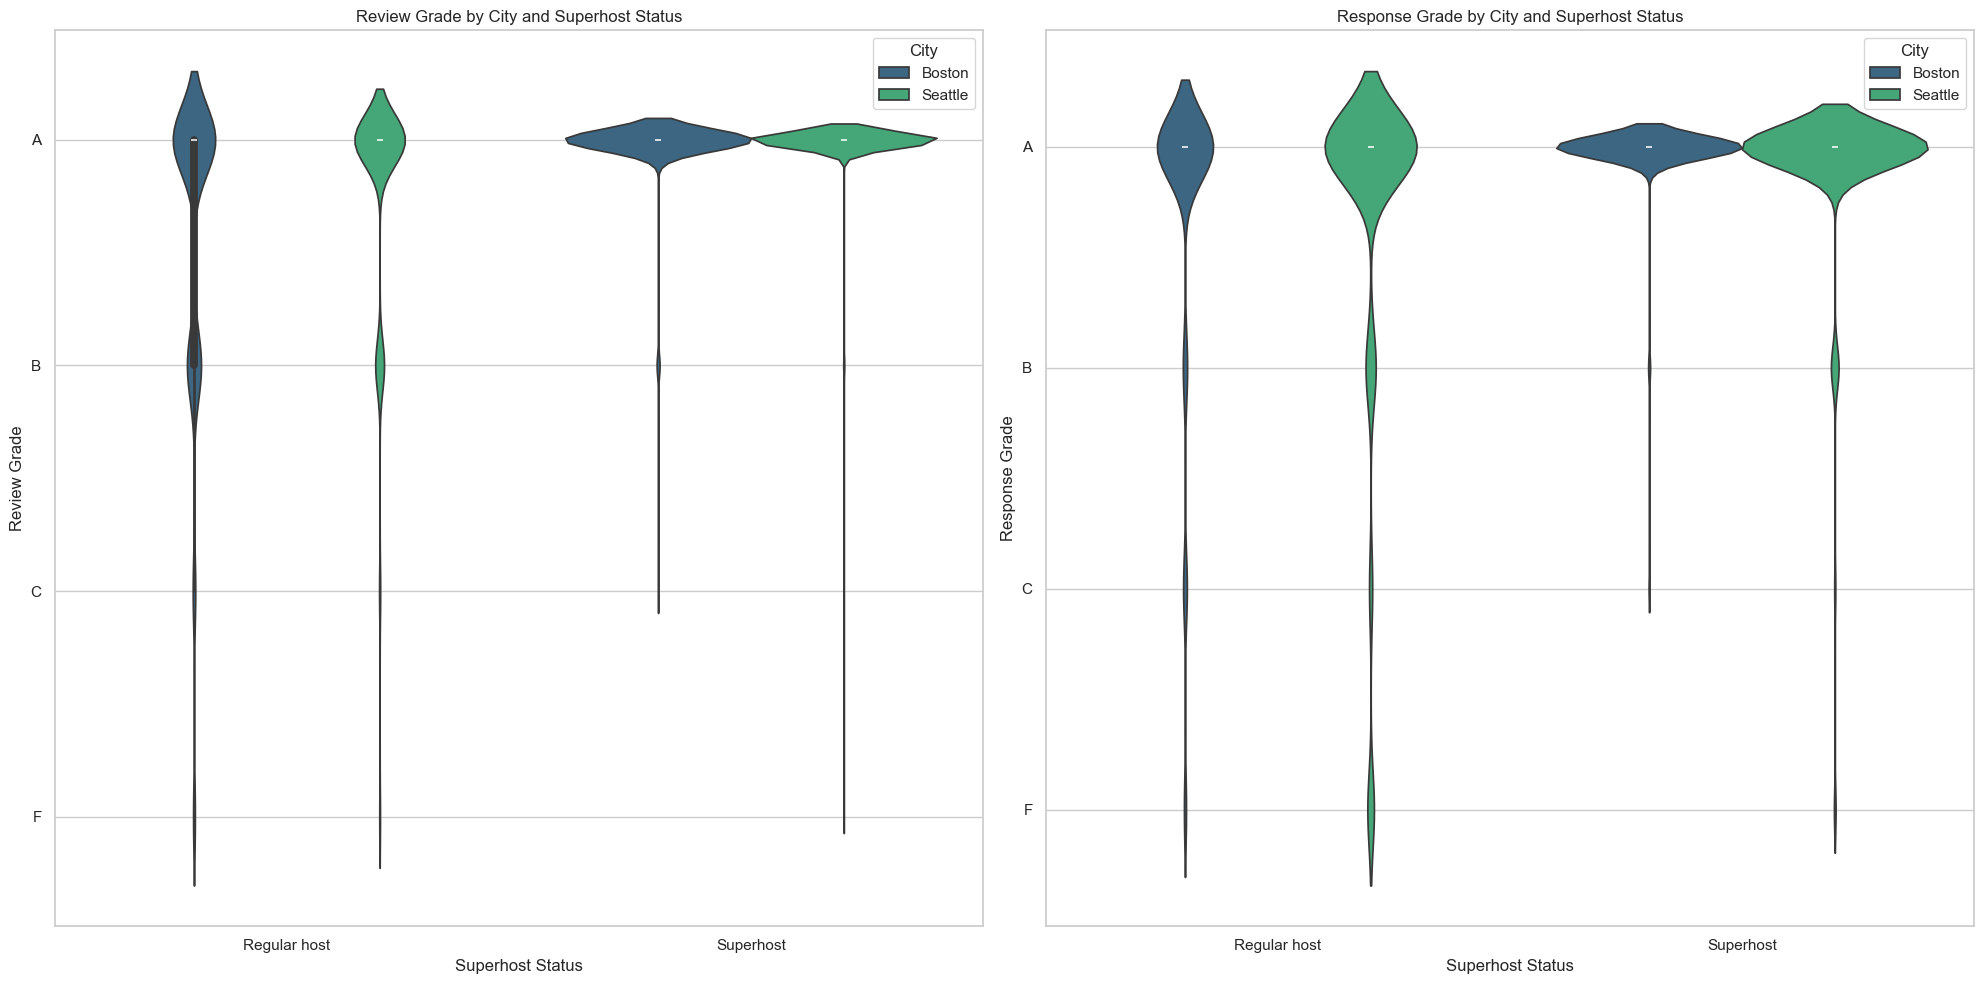

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

review_graph = sns.violinplot( data=super_host_v_response_rate, x='Superhost Status', y='Review Grade', hue='City', palette='viridis', ax=axes[0] )
response_graph = sns.violinplot( data=super_host_v_response_rate, x='Superhost Status', y='Response Grade', hue='City', palette='viridis', ax=axes[1] )

axes[0].set_title('Review Grade by City and Superhost Status')
axes[1].set_title('Response Grade by City and Superhost Status')

plt.tight_layout()
plt.show()

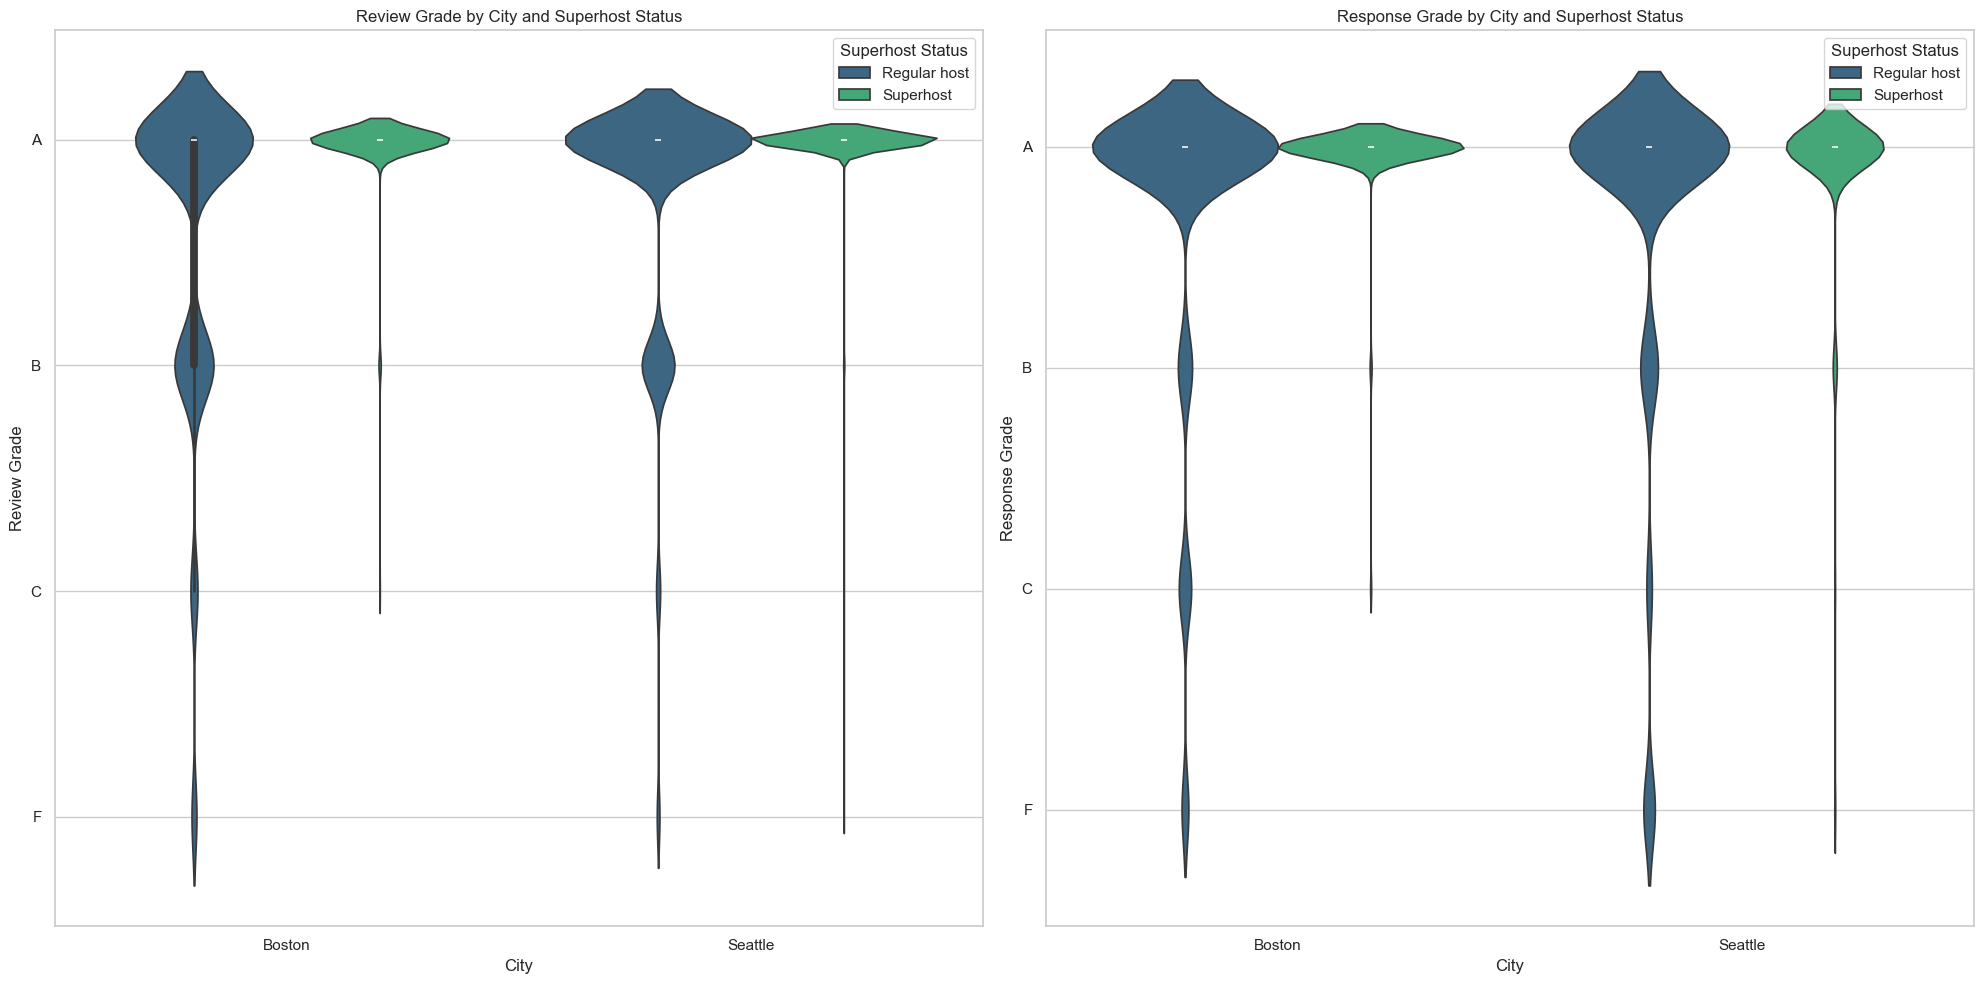

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

review_graph = sns.violinplot( data=super_host_v_response_rate, x='City', y='Review Grade', hue='Superhost Status', palette='viridis', ax=axes[0] )
response_graph = sns.violinplot( data=super_host_v_response_rate, x='City', y='Response Grade', hue='Superhost Status', palette='viridis', ax=axes[1] )

axes[0].set_title('Review Grade by City and Superhost Status')
axes[1].set_title('Response Grade by City and Superhost Status')

plt.tight_layout()
plt.show()